In [13]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [14]:
# set up data reading path, file names and column names
data_path = "../data/AReM"

folder_name = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
original_columns = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
train_files = []
test_files = []

for path, _, file in os.walk(data_path):
        for f in file:
            # find csv files 
            if (os.path.splitext(f)[1] == ".csv"):
                index = int(re.findall("\d+", f)[0])
                file_path = os.path.join(path, f)
                move = os.path.split(path)[-1]
                # split files according to the homework instructions
                if (move  in ["bending1", "bending2"] and index <3 ):
                    test_files.append(file_path)
                elif(move  not in ["bending1", "bending2"] and index <= 3): 
                    test_files.append(file_path)
                else:
                    train_files.append(file_path)

In [250]:
# check the amount
len(train_files)

69

### C(i) Research what types of time-domain features are usually used in time series classification

Research results:

Means 

Standard deviations 

Maximum and Minimum values

### 1.(c)ii Extract the time-domain features minimum, maximum, mean, median, stan-dard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [279]:

def load_data(files, original_columns, segs=1):
    
    
    # generate columns names and combine them with the number of series
    col = ['mean', 'std', 'min', '_1stquart_', 'median', '_3rdquart_','max']
    col_names = [name + str(i) for i in range(1, 6 * segs + 1) for name in col]
    
    dat  = []
    labels = []
    sniffer = csv.Sniffer()
    
    for f in files:
        
        root = os.path.dirname(f)
        activity = os.path.split(root)[-1]
        # get the labels of the data 
        labels.append(activity)
        
        # identidy the separater of the csv file
        sep = sniffer.sniff(open(f).read()).delimiter
        
        # read data and skip the 5th row, which is the head names 
        if sep == ",":
            tmp = pd.read_csv(f, skiprows=5, header=None, error_bad_lines=False, warn_bad_lines=False)
        else:
            tmp = pd.read_csv(f, skiprows=5, header=None, sep="\s+", error_bad_lines=False, warn_bad_lines=False)
        
        # restore the column of csv file 
        tmp.columns = original_columns
        
        # break the data into equal length,thus becomes 6*segs series
        seg_length = int(tmp.shape[0] / segs)
        segs_des = []
        for i in range(segs):
            cur_seg = tmp[i * seg_length : min((i + 1) * seg_length, tmp.shape[0])]
            cur_des = cur_seg.describe().drop('count').drop(columns="# Columns: time").T
            segs_des.append(cur_des.values.flatten())
        dat.append(np.concatenate(segs_des, axis=None))
    
    # convert to dataframe and name the columns based on instruction
    final_df = pd.DataFrame(dat, columns=col_names)    
    # add label 
    final_df['label'] = pd.Series(labels)
    # make sure the output is dataframe
    return pd.DataFrame(final_df)

In [19]:
stat_info = ['mean', 'std', 'min', '_1stquart_', 'median', '_3rdquart_','max']
feature = [stat + str(i) for i in range(1, 7) for stat in stat_info]
# load dataset as required
train_data = load_data(train_files, original_columns)
test_data = load_data(test_files, original_columns)

In [20]:
train_data

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,_3rdquart_5,max5,mean6,std6,min6,_1stquart_6,median6,_3rdquart_6,max6,label
0,43.954500,1.558835,35.00,43.00,44.330,45.0000,47.40,0.426250,0.338690,0.0,...,36.50,38.50,0.493292,0.513506,0.0,0.00,0.430,0.9400,1.79,bending1
1,42.179813,3.670666,33.00,39.15,43.500,45.0000,47.75,0.696042,0.630860,0.0,...,36.33,38.67,0.613521,0.524317,0.0,0.00,0.500,1.0000,2.18,bending1
2,41.678063,2.243490,33.00,41.33,41.750,42.7500,45.75,0.535979,0.405469,0.0,...,31.25,37.50,0.383292,0.389164,0.0,0.00,0.430,0.5000,1.79,bending1
3,43.454958,1.386098,37.00,42.50,43.250,45.0000,48.00,0.378083,0.315566,0.0,...,24.00,33.50,0.679646,0.622534,0.0,0.43,0.500,0.8700,5.26,bending1
4,43.969125,1.618364,36.25,43.31,44.500,44.6700,48.00,0.413125,0.263111,0.0,...,23.75,30.75,0.555313,0.487826,0.0,0.00,0.490,0.8300,2.96,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.763333,4.742208,20.75,31.67,35.290,38.2500,46.25,4.223792,2.278004,0.0,...,18.33,25.50,3.288271,1.647528,0.0,2.05,3.270,4.3050,9.39,walking
65,34.935813,4.645944,21.50,32.00,35.500,38.0625,51.00,4.115750,2.335243,0.0,...,18.25,25.00,3.280021,1.700918,0.0,2.12,3.015,4.5000,10.21,walking
66,34.333042,4.948770,18.33,31.25,34.750,38.0000,47.67,4.396958,2.568680,0.0,...,18.00,24.00,3.261583,1.617290,0.0,2.05,2.980,4.3200,8.01,walking
67,34.599875,4.731790,18.33,31.50,35.125,38.0000,45.75,4.398833,2.538521,0.0,...,18.25,23.25,3.289542,1.680170,0.0,2.12,3.015,4.2600,8.86,walking


### 1.(c)iii Estimate the standard deviation of each of the time-domain features you extracted from the data. Build a 90% bootsrap confidence interval for the standard deviation of each feature

In [21]:
# check the info showed in describe method
train_data.describe()

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,median5,_3rdquart_5,max5,mean6,std6,min6,_1stquart_6,median6,_3rdquart_6,max6
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,39.005432,2.997094,29.461159,36.962826,38.841812,41.350290,45.423333,1.510236,1.005980,0.0,...,15.814058,18.163261,24.068986,1.644086,1.047504,0.006232,0.925797,1.477971,2.160036,6.490870
std,4.917692,1.758670,8.794295,5.731647,4.956111,4.783645,4.429182,1.600701,0.902808,0.0,...,5.267414,4.957231,5.449726,1.171401,0.519420,0.051766,0.774358,1.104626,1.550393,2.540166
min,27.716375,0.032038,0.000000,26.187500,27.500000,29.000000,30.000000,0.007167,0.055106,0.0,...,2.250000,8.000000,12.000000,0.383292,0.388372,0.000000,0.000000,0.430000,0.500000,1.790000
25%,34.935813,1.500878,23.330000,31.750000,35.500000,38.250000,44.330000,0.378083,0.315566,0.0,...,13.290000,16.500000,21.000000,0.734271,0.612834,0.000000,0.430000,0.500000,1.000000,4.500000
50%,39.433792,3.198894,28.500000,39.150000,39.330000,40.250000,45.750000,0.496479,0.484086,0.0,...,16.000000,18.250000,23.250000,0.961167,0.842087,0.000000,0.470000,0.830000,1.220000,6.360000
75%,42.821983,4.614802,36.250000,41.500000,42.670000,44.750000,47.670000,2.757312,1.924366,0.0,...,17.000000,19.270000,25.000000,3.073312,1.640243,0.000000,1.797500,2.770000,4.060000,8.750000
max,48.004167,7.684146,48.000000,48.000000,48.000000,54.000000,56.250000,4.576562,2.625516,0.0,...,36.000000,36.500000,40.330000,3.532463,1.965267,0.430000,2.240000,3.340000,4.625000,13.610000


In [22]:
# so we directly choose the std info of each feature
train_data.describe().loc['std']

mean1          4.917692
std1           1.758670
min1           8.794295
_1stquart_1    5.731647
median1        4.956111
_3rdquart_1    4.783645
max1           4.429182
mean2          1.600701
std2           0.902808
min2           0.000000
_1stquart_2    0.952201
median2        1.436960
_3rdquart_2    2.158416
max2           5.147841
mean3          3.863097
std3           0.995959
min3           3.053869
_1stquart_3    4.145255
median3        3.845730
_3rdquart_3    3.946023
max3           4.759853
mean4          1.179861
std4           0.473576
min4           0.000000
_1stquart_4    0.842501
median4        1.150092
_3rdquart_4    1.566564
max4           2.302408
mean5          5.120426
std5           1.057998
min5           5.368786
_1stquart_5    5.543882
median5        5.267414
_3rdquart_5    4.957231
max5           5.449726
mean6          1.171401
std6           0.519420
min6           0.051766
_1stquart_6    0.774358
median6        1.104626
_3rdquart_6    1.550393
max6           2

In [23]:
# select all the data except the last column which contains the activity 
train_data_without_label = train_data.iloc[:, :-1]

In [24]:
len(train_data_without_label)

69

In [25]:
"""
Doc Refernces:
1. resample: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
"""
from sklearn.utils import resample

estimation = []


for i in range(500):
    # resample the data with replacement, keep the same size of resampled data
    resampled = resample(train_data_without_label, replace=True, n_samples=len(train_data_without_label))
    
    estimation.append(resampled.apply(lambda col : np.std(col, ddof=1), axis=0))
# convert list to data frame and get 5%-95% percentile
estimation = pd.DataFrame(estimation, columns=list(train_data_without_label.columns))
interval = estimation.apply(lambda col : (np.percentile(col, 5), np.percentile(col, 95)), axis=0)


In [26]:
interval

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,median5,_3rdquart_5,max5,mean6,std6,min6,_1stquart_6,median6,_3rdquart_6,max6
0,4.291959,1.551753,7.486122,5.122319,4.271275,3.935615,3.339304,1.407680,0.823275,0.0,...,3.787370,3.604344,4.367953,1.072830,0.476121,0.000000,0.702338,1.007948,1.420521,2.227941
1,5.463863,1.947142,10.011170,6.186321,5.498423,5.546555,5.393277,1.733267,0.961618,0.0,...,6.429067,6.028836,6.364421,1.234349,0.549023,0.088333,0.825811,1.168953,1.629252,2.832891


Here is the 90% CI.

### 1.(c)iv Use your judgement to select the three most important time-domain features

In [27]:
train_data

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,_3rdquart_5,max5,mean6,std6,min6,_1stquart_6,median6,_3rdquart_6,max6,label
0,43.954500,1.558835,35.00,43.00,44.330,45.0000,47.40,0.426250,0.338690,0.0,...,36.50,38.50,0.493292,0.513506,0.0,0.00,0.430,0.9400,1.79,bending1
1,42.179813,3.670666,33.00,39.15,43.500,45.0000,47.75,0.696042,0.630860,0.0,...,36.33,38.67,0.613521,0.524317,0.0,0.00,0.500,1.0000,2.18,bending1
2,41.678063,2.243490,33.00,41.33,41.750,42.7500,45.75,0.535979,0.405469,0.0,...,31.25,37.50,0.383292,0.389164,0.0,0.00,0.430,0.5000,1.79,bending1
3,43.454958,1.386098,37.00,42.50,43.250,45.0000,48.00,0.378083,0.315566,0.0,...,24.00,33.50,0.679646,0.622534,0.0,0.43,0.500,0.8700,5.26,bending1
4,43.969125,1.618364,36.25,43.31,44.500,44.6700,48.00,0.413125,0.263111,0.0,...,23.75,30.75,0.555313,0.487826,0.0,0.00,0.490,0.8300,2.96,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.763333,4.742208,20.75,31.67,35.290,38.2500,46.25,4.223792,2.278004,0.0,...,18.33,25.50,3.288271,1.647528,0.0,2.05,3.270,4.3050,9.39,walking
65,34.935813,4.645944,21.50,32.00,35.500,38.0625,51.00,4.115750,2.335243,0.0,...,18.25,25.00,3.280021,1.700918,0.0,2.12,3.015,4.5000,10.21,walking
66,34.333042,4.948770,18.33,31.25,34.750,38.0000,47.67,4.396958,2.568680,0.0,...,18.00,24.00,3.261583,1.617290,0.0,2.05,2.980,4.3200,8.01,walking
67,34.599875,4.731790,18.33,31.50,35.125,38.0000,45.75,4.398833,2.538521,0.0,...,18.25,23.25,3.289542,1.680170,0.0,2.12,3.015,4.2600,8.86,walking


In [28]:
binary_train_data = pd.DataFrame(train_data)


In [29]:
binary_train_data.loc[binary_train_data['label'].isin(['bending1', 'bending2']), 'label'] = 1
binary_train_data.loc[binary_train_data['label'] != 1, 'label'] = 0


In [30]:
binary_train_data

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,_3rdquart_5,max5,mean6,std6,min6,_1stquart_6,median6,_3rdquart_6,max6,label
0,43.954500,1.558835,35.00,43.00,44.330,45.0000,47.40,0.426250,0.338690,0.0,...,36.50,38.50,0.493292,0.513506,0.0,0.00,0.430,0.9400,1.79,1
1,42.179813,3.670666,33.00,39.15,43.500,45.0000,47.75,0.696042,0.630860,0.0,...,36.33,38.67,0.613521,0.524317,0.0,0.00,0.500,1.0000,2.18,1
2,41.678063,2.243490,33.00,41.33,41.750,42.7500,45.75,0.535979,0.405469,0.0,...,31.25,37.50,0.383292,0.389164,0.0,0.00,0.430,0.5000,1.79,1
3,43.454958,1.386098,37.00,42.50,43.250,45.0000,48.00,0.378083,0.315566,0.0,...,24.00,33.50,0.679646,0.622534,0.0,0.43,0.500,0.8700,5.26,1
4,43.969125,1.618364,36.25,43.31,44.500,44.6700,48.00,0.413125,0.263111,0.0,...,23.75,30.75,0.555313,0.487826,0.0,0.00,0.490,0.8300,2.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.763333,4.742208,20.75,31.67,35.290,38.2500,46.25,4.223792,2.278004,0.0,...,18.33,25.50,3.288271,1.647528,0.0,2.05,3.270,4.3050,9.39,0
65,34.935813,4.645944,21.50,32.00,35.500,38.0625,51.00,4.115750,2.335243,0.0,...,18.25,25.00,3.280021,1.700918,0.0,2.12,3.015,4.5000,10.21,0
66,34.333042,4.948770,18.33,31.25,34.750,38.0000,47.67,4.396958,2.568680,0.0,...,18.00,24.00,3.261583,1.617290,0.0,2.05,2.980,4.3200,8.01,0
67,34.599875,4.731790,18.33,31.50,35.125,38.0000,45.75,4.398833,2.538521,0.0,...,18.25,23.25,3.289542,1.680170,0.0,2.12,3.015,4.2600,8.86,0


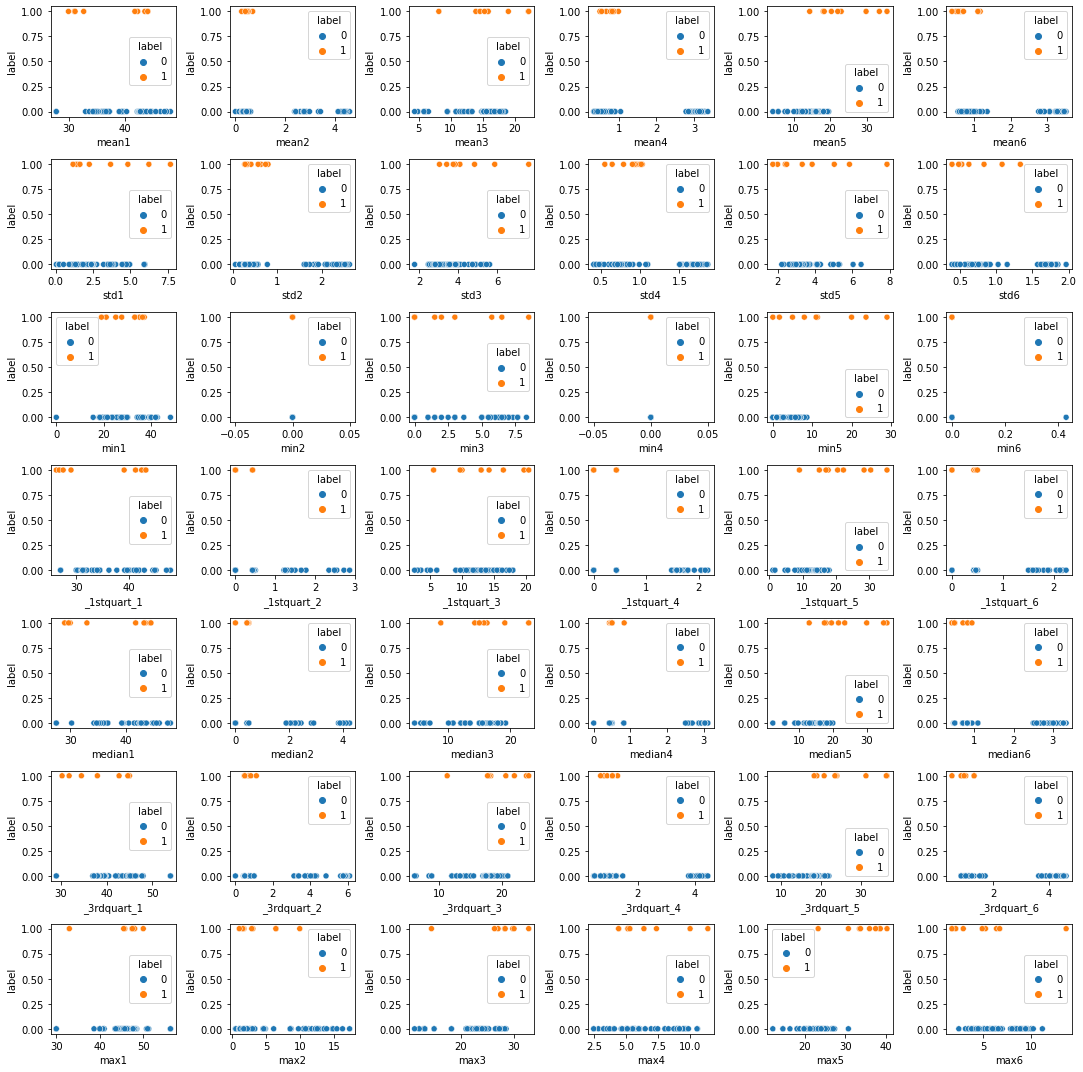

In [31]:
fig, axes = plt.subplots(7, 6, figsize=(15, 15))

for num, name in enumerate(stat_info):
    for i in range(1,7):
        sns.scatterplot(x = name+ str(i) ,y = 'label',hue= 'label',data=binary_train_data,ax= axes[num,i -1])

        
# rescale the output plots
plt.tight_layout()
plt.show()
#sns.scatterplot(binary_train_data['min2'],binary_train_data['label'],hue= binary_train_data['label'])

> According our next classfication problem (bend or not bend), so define two labels here. And we plot the scatterplots of every single feature, thus we can see the label distribution clearly.

>Important feature standard:

>Distinct distribution between class 1 and class0. Less overlap in the distribution the better. This means there can be typical value for each class that helps classify the data.

> Acoording to the plots and the two reasons, I choose max,median 75 percentile

## 1.(d) Binary Classification Using Logistic Regression

### 1.(d)i Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [32]:
selected_data = binary_train_data[['max1','max2','max6','median1','median2','median6','_3rdquart_1','_3rdquart_2','_3rdquart_6','label']]
#sns.pairplot()

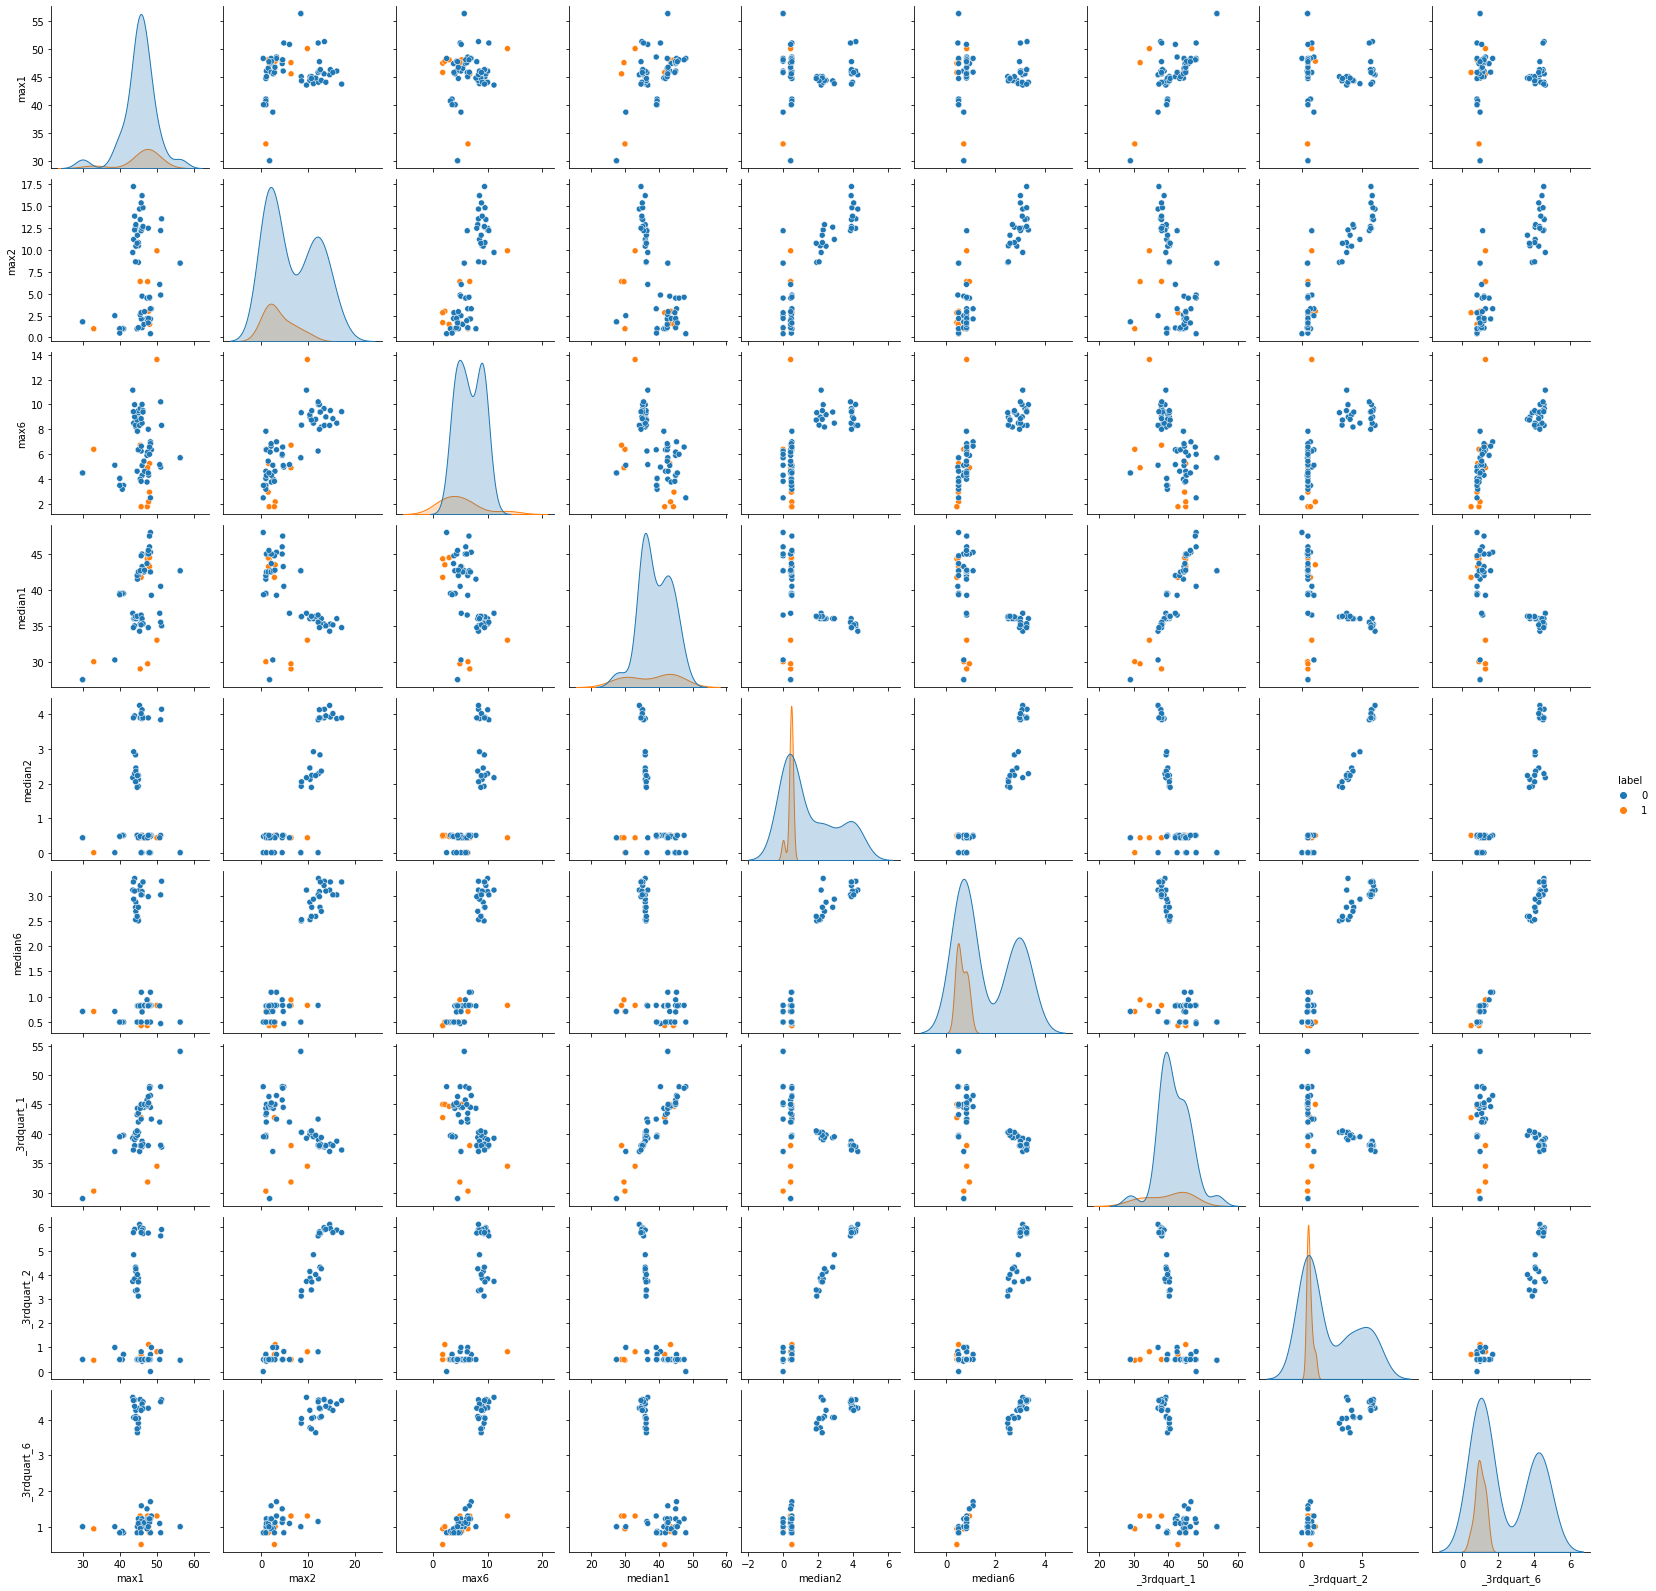

In [93]:
sns.pairplot(selected_data,hue='label')

### 1.(d)ii Break each time series in your training set into two (approximately) equal length time series.

In [38]:
# check the column names
feature = [stat + str(i) for i in range(1, 13) for stat in stat_info]


In [35]:
train_data_two_equal = load_data(train_files, original_columns, segs=2)
test_data_two_equal = load_data(test_files, original_columns, segs=2)

In [37]:
binary_train_data_two_equal

,mean1,std1,min1,_1stquart_1,median1,_3rdquart_1,max1,mean2,std2,min2,...,_3rdquart_11,max11,mean12,std12,min12,_1stquart_12,median12,_3rdquart_12,max12,label
0,44.057167,1.556971,36.50,43.2500,44.500,45.0000,46.50,0.381042,0.329540,0.0,...,36.2500,38.25,0.388333,0.478528,0.00,0.0000,0.000,0.7100,1.50,1
1,43.278875,3.473355,33.75,42.0000,45.000,45.2500,47.75,0.673292,0.634285,0.0,...,33.7500,38.50,0.586083,0.491873,0.00,0.0000,0.470,0.8700,2.18,1
2,41.621208,3.118644,33.00,39.6525,42.330,44.2500,45.75,0.623083,0.489595,0.0,...,30.5625,36.00,0.347500,0.363144,0.00,0.0000,0.430,0.5000,1.50,1
3,44.117042,1.359836,39.00,43.5000,45.000,45.0000,48.00,0.250042,0.314099,0.0,...,23.7500,26.00,0.543875,0.473445,0.00,0.4300,0.500,0.7100,4.06,1
4,43.486208,1.281976,36.67,42.3300,43.710,44.5000,45.00,0.378667,0.284434,0.0,...,23.5000,26.00,0.585750,0.487918,0.00,0.4225,0.500,0.8300,2.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.966250,4.733014,22.33,32.0000,35.500,38.7500,46.00,4.207958,2.331940,0.0,...,18.5000,25.25,3.430208,1.647979,0.00,2.1700,3.350,4.4400,9.39,0
65,34.737042,4.276717,21.50,32.0000,35.500,37.7500,45.67,4.217333,2.337759,0.0,...,18.2500,25.00,3.225917,1.665326,0.00,2.0500,3.085,4.3500,10.21,0
66,33.886458,5.143776,18.33,30.4575,34.375,37.5000,45.00,4.332208,2.453111,0.0,...,18.2500,24.00,3.274750,1.670593,0.00,2.0500,2.955,4.4375,8.01,0
67,34.836458,4.869092,18.33,32.0000,35.750,38.6900,44.00,4.257750,2.512633,0.0,...,18.2500,23.00,3.409458,1.707089,0.47,2.1700,3.110,4.3450,8.84,0


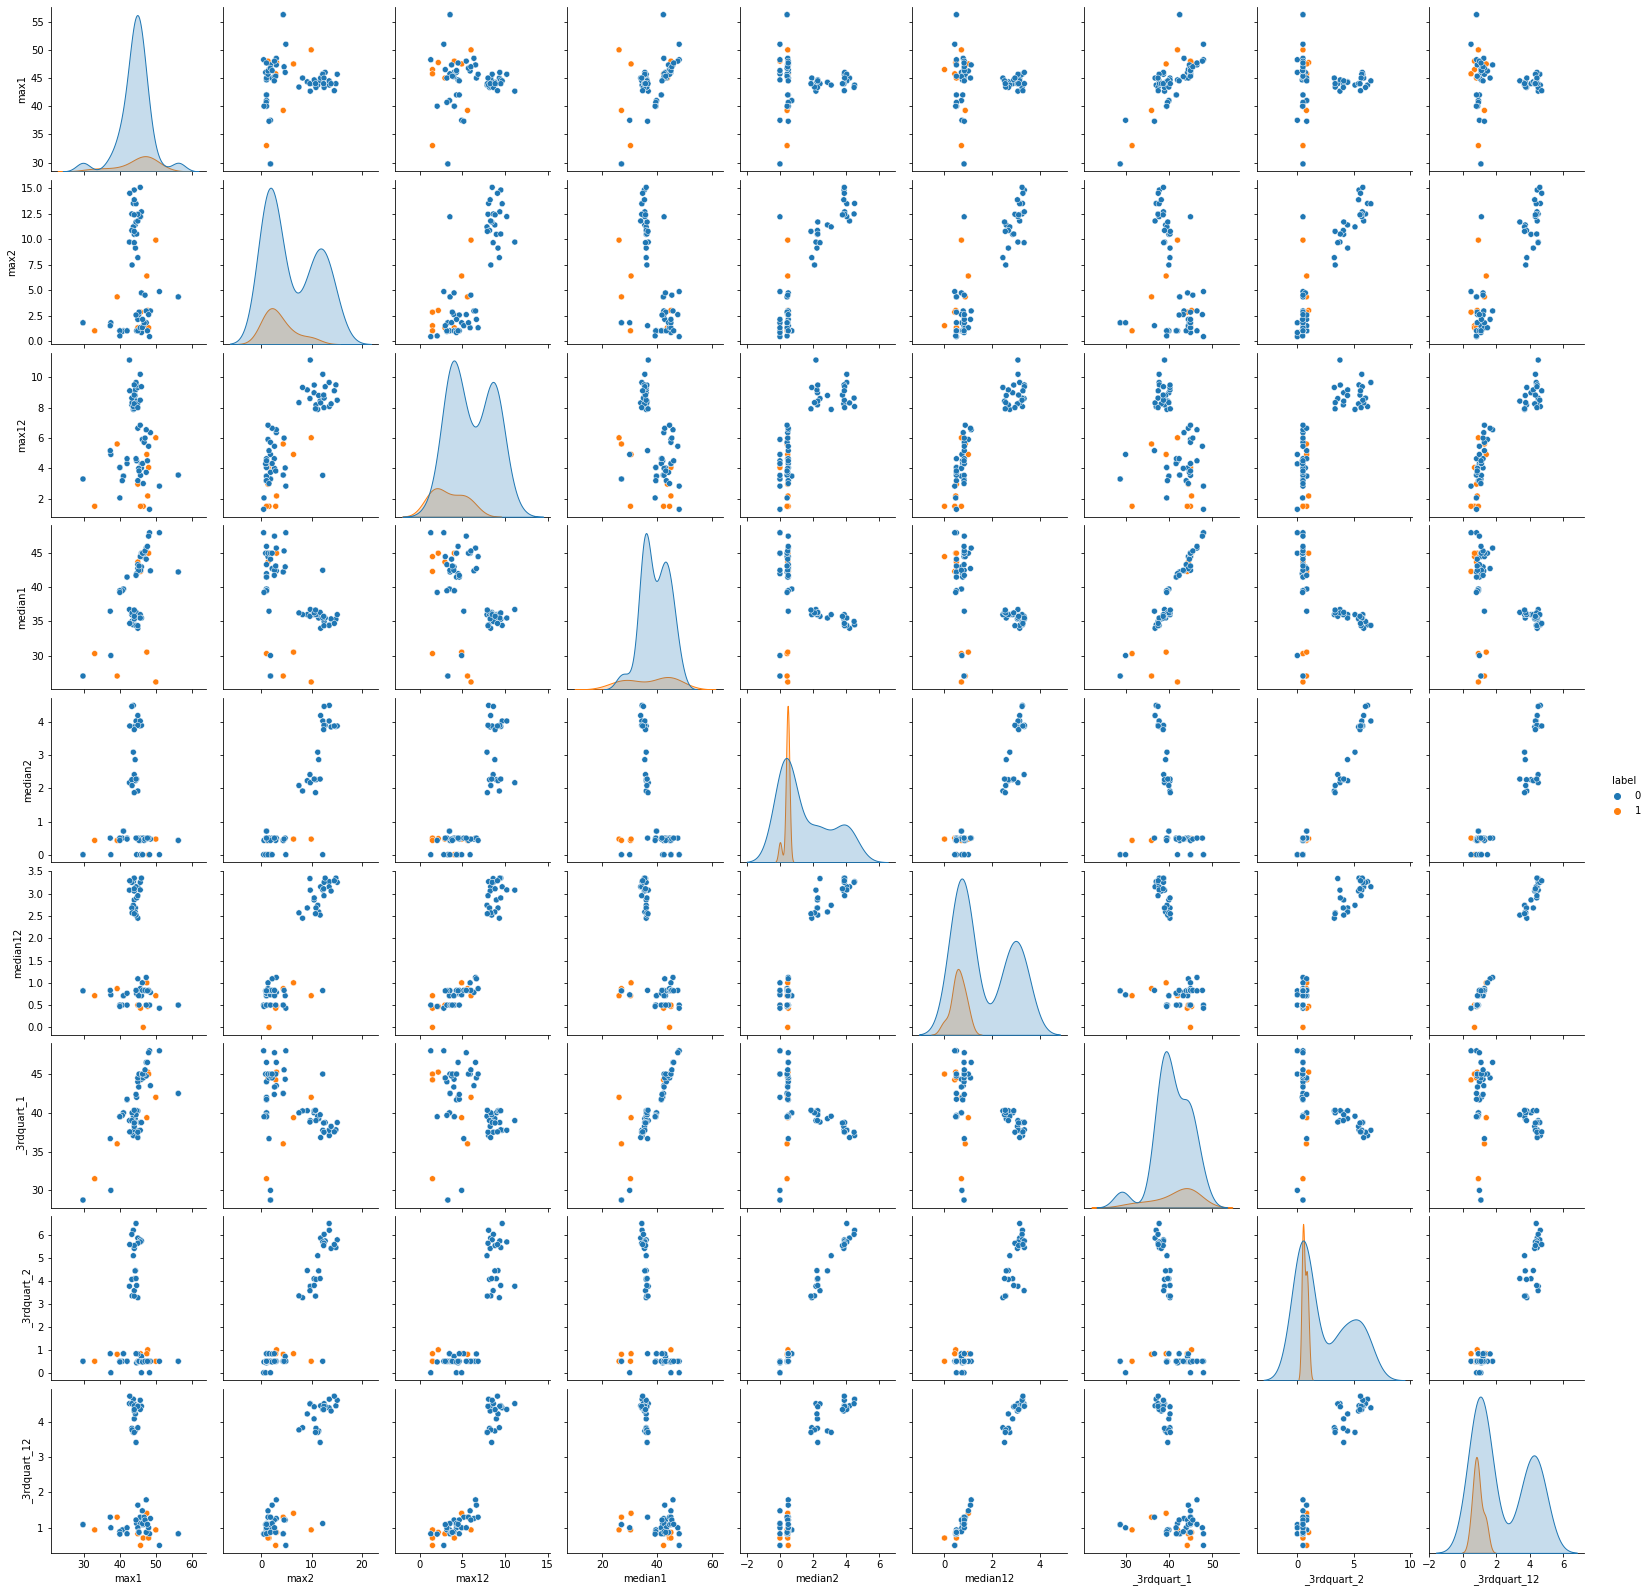

In [38]:
# draw the pairplot of the selected columns
selected_data_two_equal = binary_train_data_two_equal[['max1','max2','max12','median1','median2','median12','_3rdquart_1','_3rdquart_2','_3rdquart_12','label']]
sns.pairplot(selected_data_two_equal,hue='label')

Comparing the two plots, the distribution are slightly different and there is no significant difference.

### 1.(d)-iii Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [48]:
def ownLosgisticRegression(train,l,penalty):
    columns  = original_columns
    feature = [stat + str(i) for i in range(1, 6*l + 1) for stat in stat_info]
    
    training_data = load_data(train, columns, segs=l)
    training_data.loc[training_data['label'].isin(['bending1', 'bending2']), 'label'] = "1"
    training_data.loc[training_data['label'] != "1" , 'label'] = "0"
    
    train_X, train_y = training_data.iloc[:,:-1], training_data['label']
    
    if penalty == 'l1':
        s = 'liblinear'
    else:
        s = 'lbfgs'
    
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
    model = LogisticRegression(penalty=penalty, solver=s)
    selector = RFECV(estimator=model, cv=kfold, scoring='accuracy')
    selector.fit(train_X, train_y)
    
    # return the feature selector
    return model, selector

In [49]:
best_p = []
score = []

for l in range(1, 21):
    classifier_model, selector = ownLosgisticRegression(train_files,l, penalty='none')
    best_p.append(selector.n_features_)
    score.append(selector.grid_scores_)
    print("Pair {}, scores {}".format((l, best_p[-1]), max(selector.grid_scores_), 4))

Pair (1, 5), scores 1.0
Pair (2, 20), scores 0.9857142857142858
Pair (3, 1), scores 0.9703296703296704
Pair (4, 17), scores 0.9857142857142858
Pair (5, 11), scores 0.9714285714285715
Pair (6, 8), scores 0.9714285714285715
Pair (7, 55), scores 0.9857142857142858
Pair (8, 80), scores 0.9714285714285715
Pair (9, 31), scores 0.9714285714285715
Pair (10, 93), scores 0.9857142857142858
Pair (11, 63), scores 0.9857142857142858
Pair (12, 34), scores 0.9857142857142858
Pair (13, 5), scores 0.9857142857142858
Pair (14, 56), scores 0.9714285714285715
Pair (15, 7), scores 0.9857142857142858
Pair (16, 6), scores 0.9857142857142858
Pair (17, 5), scores 0.9857142857142858
Pair (18, 44), scores 0.9857142857142858
Pair (19, 69), scores 0.9857142857142858
Pair (20, 13), scores 0.9857142857142858


The wrong way is to only perform cross-validation after choosing a specific l, the correct way is to choose (l, p) simultaneously using cross-validation

### 1.(d)-iv Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression $\beta_i$’s as well as the p-values associated with them.

In [50]:
classifier, selector = ownLosgisticRegression(train_files,1, penalty='none')

best_feature = [f for i, f in enumerate(feature) if selector.support_[i]]

best_feature

['_3rdquart_1', 'max2', 'min5', '_1stquart_5', 'max5']

In [56]:
# use statmodels package here to get p-values
import statsmodels.api as sm
import statsmodels.formula.api as smf

train_data = load_data(train_files, original_columns, segs=1)
train_data.loc[train_data['label'].isin(['bending1', 'bending2']), 'label'] = 1
train_data.loc[train_data['label'] != 1, 'label'] = 0
train_X, train_y = train_data.iloc[:, :-1], train_data['label']

# add constant to features
train_X_const = sm.add_constant(train_X[best_feature].to_numpy())


In [60]:
# fit the model
model = sm.Logit(train_y.to_numpy(dtype=float), train_X_const)

logit = model.fit(method='bfgs')

print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                   1.000
Time:                        15:10:18   Log-Likelihood:            -1.5602e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0993   2.29e+08   -4.

All the predictors' pvalue are 1

In [69]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

train_y_float = train_y.to_numpy(dtype='float')


classifier.fit(train_X[best_feature],train_y_float)
predicted = classifier.predict(train_X[best_feature])
predicted_prob = classifier.predict_proba(train_X[best_feature])



In [70]:
# train set confusion matrix result
confusion_matrix(train_y_float, predicted)


array([[60,  0],
       [ 0,  9]], dtype=int64)

No handles with labels found to put in legend.


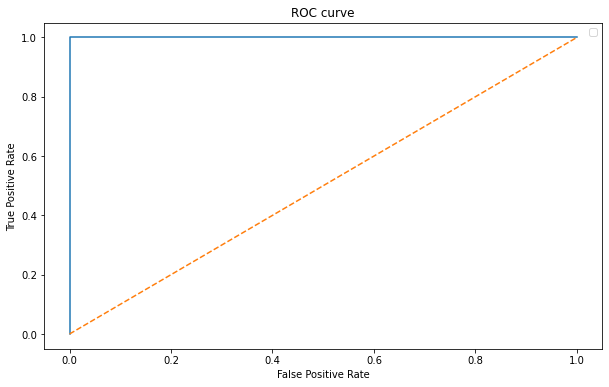

In [80]:
# roc of train set
fpr, tpr, thresholds = roc_curve(train_y_float, predicted_prob[:, 1], pos_label=1)

fig, axes = plt.subplots(figsize=(10, 6))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1],'--')
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

In [74]:
print("ROC curve area is = {} ".format(roc_auc))

ROC curve area is = 1.0 


### 1.(d)v Test the classifier on the test set.

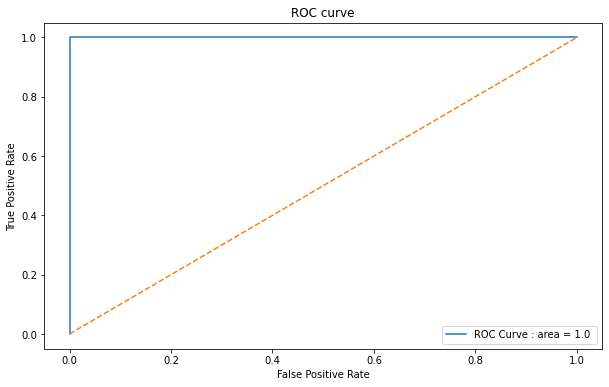

In [86]:
'''roc of the test set result '''
test_data = load_data(test_files, original_columns, segs=1)
test_data.loc[test_data['label'].isin(['bending1', 'bending2']), 'label'] = 1
test_data.loc[test_data['label'] != 1, 'label'] = 0
test_X, test_y = test_data.iloc[:, :-1], test_data['label']

predicted = classifier.predict(test_X[best_feature])
predicted_prob = classifier.predict_proba(test_X[best_feature])

fpr, tpr, thresholds = roc_curve(test_y.to_numpy(dtype="float"), predicted_prob[:, 1], pos_label=1)

fig, axes = plt.subplots(figsize=(10, 6))

roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

In [88]:
print("ROC curve area is = {} ".format(roc_auc))

ROC curve area is = 1.0 


In [87]:
confusion_matrix(test_y.to_numpy(dtype="float"), predicted)

array([[15,  0],
       [ 0,  4]], dtype=int64)

So the test accuracy and the cross-validation accuracy are both 1, which means correctly classify all the test data.

### 1.(d)vi Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

>Yes. 
> Remember previous statsmodel's statement :
"Complete Separation: The results show that there is complete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified."

### 1.(d)vii From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.


**Ans:** Yes. According to the confusion matrix, we can see that the number of non-bending class is 60 with label 0, which is much more than the bending class ( 9 with label 1).

In [95]:
# Therefore we need to make sure the dataset is balanced, and we decide to mantain
# the ratio to be 1:3, which means 9 bending, 27 not bending in our training data.


train_data = load_data(train_files, original_columns, segs=1)
train_data.loc[train_data['label'].isin(['bending1', 'bending2']), 'label'] = 1
train_data.loc[train_data['label'] != 1, 'label'] = 0




In [99]:
pos = train_data[train_data['label'] ==1]
neg = train_data[train_data['label'] ==0]

#select 3*9 data from class 0
balanced_neg = neg.sample(n=27, random_state= 99)

balanced_train = pos.append(balanced_neg)

In [ ]:
train_X, train_y = balanced_train.iloc[:, :-1], balanced_train['label']


In [108]:
best_feature

['_3rdquart_1', 'max2', 'min5', '_1stquart_5', 'max5']

In [110]:
# select teh best features 
train_X = train_X[best_feature]

In [104]:
# get the test data ready 
test_data = load_data(test_files, original_columns, segs=1)
test_data.loc[test_data['label'].isin(['bending1', 'bending2']), 'label'] = 1
test_data.loc[test_data['label'] != 1, 'label'] = 0
test_X, test_y = test_data.iloc[:, :-1], test_data['label']



In [117]:
logit_model=LogisticRegression(
                    penalty='none',solver='lbfgs',verbose=1,max_iter=99, class_weight= 'balanced').fit(
                    train_X,train_y.to_numpy('float'))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


No handles with labels found to put in legend.


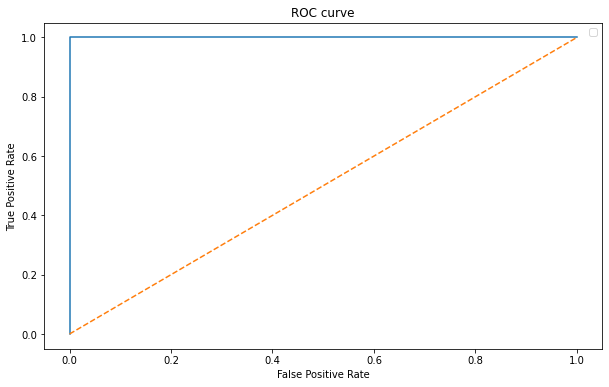

In [118]:
# # roc on train set 

predicted = logit_model.predict(train_X)
predicted_prob = logit_model.predict_proba(train_X)

fpr, tpr, thresholds = roc_curve(train_y.to_numpy(dtype="float"), predicted_prob[:, 1], pos_label=1)

fig, axes = plt.subplots(figsize=(10, 6))

roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve Train")
plt.show()

The auc area is 1.0 according to the graph.

In [ ]:
print("ROC curve area is = {} ".format(roc_auc))

In [119]:
#confusion matrix of train set
confusion_matrix(train_y.to_numpy(dtype=float), predicted.round())

array([[27,  0],
       [ 0,  9]], dtype=int64)

No handles with labels found to put in legend.


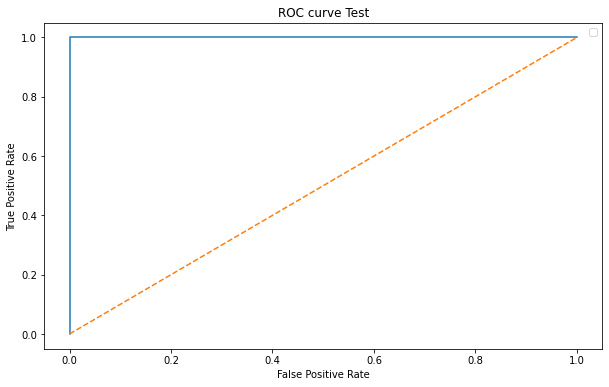

In [123]:
# roc on test set 
predicted = logit_model.predict(test_X[best_feature])
predicted_prob = logit_model.predict_proba(test_X[best_feature])

fpr, tpr, thresholds = roc_curve(test_y.to_numpy(dtype="float"), predicted_prob[:, 1], pos_label=1)

fig, axes = plt.subplots(figsize=(10, 6))

roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve Test")
plt.show()

In [124]:
print("ROC curve area is = {} ".format(roc_auc))

ROC curve area is = 1.0 


In [125]:
# confusion matrix of test set
confusion_matrix(test_y.to_numpy(dtype=float), predicted.round())

array([[15,  0],
       [ 0,  4]], dtype=int64)

After balancing the training data to ratio 1:3, the auc area for train and test are all 1 and all data in test and train all correctly classified.

## 1.(e) Binary Classification Using L1-penalized logistic regression

### 1.(e)-i. Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p-values for variable selection, use L1 regularization.

In [260]:
def sliced_data_prep(l):
    from sklearn.preprocessing import Normalizer
    norm = Normalizer()
    
    columns  = original_columns
    feature = [stat + str(i) for i in range(1, 6*l + 1) for stat in stat_info]
    training_data = load_data(train_files, columns, segs=l)
    training_data.loc[training_data['label'].isin(['bending1', 'bending2']), 'label'] = "1"
    training_data.loc[training_data['label'] != "1" , 'label'] = "0"
    
    train_X, train_y = training_data.iloc[:,:-1], training_data['label']
    return train_X,train_y

In [261]:
from sklearn.linear_model import LogisticRegressionCV

best_C = [] # Store the 20 C value selected for l ranging from 1 to 20
best_score = [] # Store the 20 cv-scores corresponding to the best C for each l ranging from 1 to 20
for l in range(1,21):
    X_train, y_train = sliced_data_prep(l) 
    logregcv = LogisticRegressionCV(Cs=np.logspace(-1, 1, 50), 
                                    cv=5,
                                    penalty='l1', 
                                    solver='liblinear', 
                                    n_jobs=-1,
                                    class_weight='balanced', 
                                    max_iter=100)
    logregcv.fit(X_train, y_train)
    C_index = np.where(logregcv.Cs_ == logregcv.C_)[0][0]
    best_C.append(logregcv.C_[0])
    best_score.append(np.mean(list(zip(*logregcv.scores_['1']))[C_index]))



In [262]:
max_index = best_score.index(max(best_score))
index,best_C[max_index]

(9, 1.5264179671752334)

So the best combo of l and the weight of l1 penalty is (9,1.526)

In [172]:
max(best_score)

1.0

### 1.(e)-ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

>Comparing the two methods, the highest accuracy are both 1.0 so both of them perform perfect on this small dataset. So I can't tell which one is better at fiting the data. But in L1 method, we don't need to manually extract the good features, L1 helped us eliminate the unimportant feautres, so this is more convinient.

> L1-penalized is more easier to implement, we don't need extra RFECV then combine it with logistic regression becauses we can directly use logisticregression cv and its attributed save the best C and CV score for us.

## 1.(f) Multi-class Classification

### 1.(f)-i Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set cross-validation for λ automatically.

In [201]:
# define a fucntion to get data for multi-classification problem
def multi_sliced_data_prep(l):
    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    
    
    columns  = original_columns
    feature = [stat + str(i) for i in range(1, 6*l + 1) for stat in stat_info]
    

    training_data = load_data(train_files, columns, segs=l)
    training_data.loc[training_data['label'].isin(['bending1', 'bending2']), 'label'] = 'bending'
    training_data['label'] = lb.fit_transform(training_data['label'])
    
    testing_data = load_data(test_files, columns, segs=l)
    testing_data.loc[testing_data['label'].isin(['bending1', 'bending2']), 'label'] = 'bending'
    testing_data['label'] = lb.fit_transform(testing_data['label'])
    
    
    train_X, train_y = training_data.iloc[:,:-1], training_data['label']
    test_X, test_y = testing_data.iloc[:,:-1], testing_data['label']
    
    return train_X,train_y,test_X,test_y

In [202]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegressionCV

best_C = [] 
best_score = [] 
for l in range(1,21):
    X_train, y_train, X_test, y_test= multi_sliced_data_prep(l) 
    logregcv_m = LogisticRegressionCV(Cs=np.logspace(-1, 1, 50), # 50 candidates for C instead of the default 10
                                    cv=5,
                                    penalty='l1', 
                                    solver='liblinear', 
                                    n_jobs=-1,
                                    class_weight='balanced',
                                    multi_class= 'auto'
                                    ,max_iter=100)
    logregcv_m.fit(X_train, y_train)
    C_index = np.where(logregcv_m.Cs_ == logregcv_m.C_[0])[0][0]
    best_C.append(logregcv_m.C_[0])
    best_score.append(np.mean(list(zip(*logregcv_m.scores_[1]))[C_index]))

In [205]:
best_score.index(max(best_score))

11

In [206]:
best_C[11]

1.0481131341546859

So when l = 11, we have the highest accuracy score, so (l,C) = (11,1.0481131341546859)

In [243]:
#use the best l and C we get to test on the test set

X_train, y_train, X_test, y_test= multi_sliced_data_prep(11)


log_multi = LogisticRegression(C=1.0481131341546859, 
                                 penalty='l1', 
                                 solver='liblinear', 
                                 multi_class='auto',
                                 n_jobs=-1,
                                 max_iter=100)
log_multi.fit(X_train, y_train)

LogisticRegression(C=1.0481131341546859, n_jobs=-1, penalty='l1',
                   solver='liblinear')

In [244]:
log_multi.score(X_test, y_test)
1 - log_multi.score(X_test, y_test)

0.26315789473684215

so the test error is 0.26315789473684215


In [245]:
# confusion matrix
y_pred = log_multi.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3, 1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 2, 0, 1, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

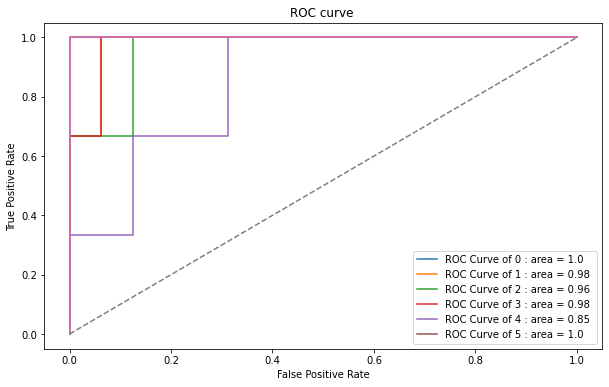

In [246]:
# roc curve and auc area
predicted_prob = log_multi.predict_proba(X_test)


fig, axes = plt.subplots(figsize=(10, 6))

for i, c in enumerate(gnb_model.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, predicted_prob[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 2)))
    
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve ")
plt.show()

### 1.(f)-ii Repeat 1(f)i using a Naive Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [211]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score

In [214]:
best_score = []
for l in range(1, 21):
    X_train, y_train, X_test,y_test= multi_sliced_data_prep(l)
    gnb = GaussianNB()
    best_score.append(cross_val_score(gnb, X_train, y_train, cv=5, n_jobs=-1)) # Get 5-fold cross-validation score

In [220]:
# show the accuracy score based on l from 1 to 20
list(map(np.mean, score))

[0.9754840397697542,
 0.9480900052328624,
 0.9554334554334555,
 0.9605376766091053,
 0.9659811616954475,
 0.9662654805511949,
 0.9678291096658446,
 0.9628335949764523,
 0.9592941450084307,
 0.9636342229199372,
 0.961626468769326,
 0.9695272980987267,
 0.9675783923036673,
 0.9645735217163789,
 0.9667974882260597,
 0.9654532967032968,
 0.9705282112845138,
 0.9644717716146287,
 0.9695461180423588,
 0.9629395604395605]

So when l = 1, GaussianNB get the best performance.

In [233]:
# fit GNB
 
X_train, y_train, X_test, y_test = multi_sliced_data_prep(1)
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
gnb_model.score(X_test, y_test)

0.8947368421052632

The accuracy is 0.8947368421052632

In [235]:
# confusion matrix
y_pred = gnb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

In [236]:
gnb_model.classes_

array([0, 1, 2, 3, 4, 5])

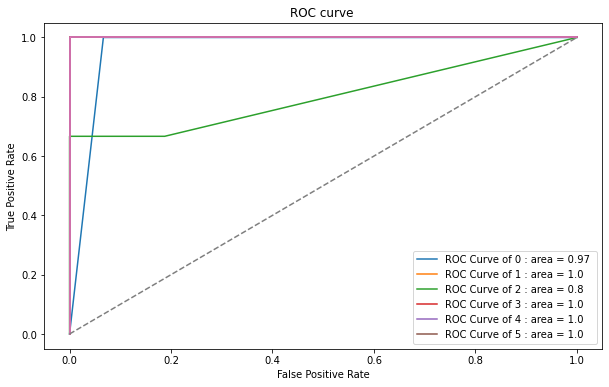

In [239]:
# roc of the test set
predicted_prob = gnb_model.predict_proba(test_X)


fig, axes = plt.subplots(figsize=(10, 6))

for i, c in enumerate(gnb_model.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, predicted_prob[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 2)))
    
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve ")
plt.show()

### Multinomial Naive Bayes


In [227]:
# Multinomial Naive Bayes
from sklearn.model_selection import GridSearchCV

# we create a list of alpha for gridsearch to choose the best
#alpha here is a smoothing parameter
params = {'alpha': np.logspace(-1, 1, 100)}

# Instantiate the classifier
best_score = []
best_alpha = []
for l in range(1, 21):
    X_train, y_train, X_test,y_test= multi_sliced_data_prep(l)
    mnb = MultinomialNB()
    mnb_cv = GridSearchCV(estimator=mnb,
                          param_grid=params,
                          cv=5, n_jobs=-1) # Again, get 5-fold cv
    mnb_cv.fit(X_train, y_train)
    best_score.append(mnb_cv.best_score_)
    best_alpha.append(mnb_cv.best_params_)

In [226]:
best_param

[{'alpha': 1.384886371393873},
 {'alpha': 0.01},
 {'alpha': 0.01},
 {'alpha': 0.01},
 {'alpha': 0.04862601580065353},
 {'alpha': 0.033516026509388425},
 {'alpha': 0.012045035402587823},
 {'alpha': 0.1788649529057435},
 {'alpha': 0.01747528400007684},
 {'alpha': 0.01},
 {'alpha': 0.01},
 {'alpha': 0.02104904144512021},
 {'alpha': 0.01},
 {'alpha': 0.01},
 {'alpha': 0.025353644939701114},
 {'alpha': 0.01},
 {'alpha': 1.8307382802953698},
 {'alpha': 0.0774263682681127},
 {'alpha': 0.01},
 {'alpha': 0.01}]

In [229]:
best_score.index(max(best_score))

13

So when l = 13, MNB got the best score and the alpha is 0.01

In [240]:
# Refit MNB

X_train, y_train, X_test, y_test = multi_sliced_data_prep(13)
mnb = MultinomialNB(alpha=0.01)
mnb_model = mnb.fit(X_train, y_train)
mnb_model.score(X_test, y_test)

0.8421052631578947

So the MNB 's accuracy is 0.8421

In [231]:
#confusion matrix
y_pred = mnb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

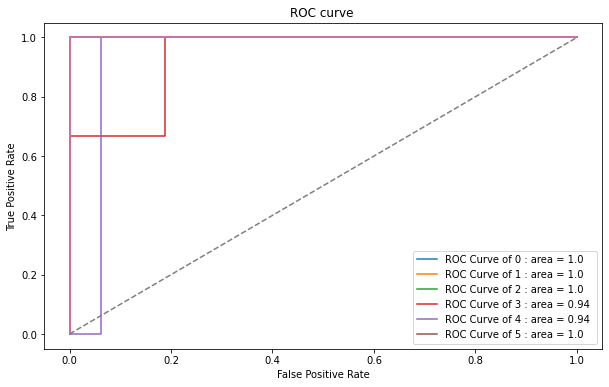

In [242]:
# roc of the test set
predicted_prob = mnb_model.predict_proba(X_test)


fig, axes = plt.subplots(figsize=(10, 6))

for i, c in enumerate(gnb_model.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, predicted_prob[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 2)))
    
axes.plot(fpr, tpr)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve ")
plt.show()

### 1.(f)-iii Which method is better for multi-class classification in this problem?

**Ans:** 

Accuracy of the three classifiers are :
    L1 Logsitic Regression: 0.736
    GNB: 0.895
    MNB: 0.842
 
Baesd on the accuracy score, GNB is the best model. GNB is good at dealing with continuous variables while MNB is good at categorical variables, so the result is resonable.

Although the accuracy score of L1 logistic is the lowest, its auc area of each class is very close to GNB and MNB, which means its performance is not bad.


# 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Ans:** _I think cubic regression has a lower RSS than the linear regression beacause the cubic can make a closer fit to the training data, which leads to a smaller RSS._


(b) Answer (a) using test rather than training RSS.

**Ans:** _As the cubia regression fits the training data too well, it will suffer overffiting. Thus, I will expect a lower RSS for the linear regression when using test data._


(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Ans:** _The a cubic regression has lower training RSS than the linear one because it has more predictors and is more flexible. The true relationship does not make a difference here and because the cubic one can fit closer to the training data._


(d) Answer (c) using test rather than training RSS.

**Ans:** _For this question, we don't have enough information to tell since it says "we don't know how far it is from linear"._

# 3. ISLR 4.8.3
This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.

Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.


**Ans:**

![](images/552-2.jpg)

# Please check the images file and the image"552-2" is the answer to this, if you can not see it on github.

# 4. ISLR 4.8.7

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X}$ = 10, while the mean for those that didn’t was $\bar{X}$ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.


**Ans:**
![](images/552-1.jpg)

# Please check the images file and the image"552-1" is the answer to this, if you can not see it on github.